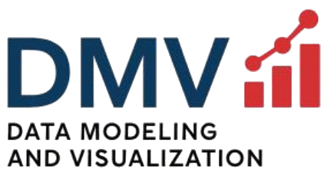

# **Jittering, Contour plots and Word Clouds**

## **1. Concept of Jittering**

What is it?

* Adding small random noise to data points when plotting (esp. categorical x-axis) to reduce overplotting.

* Helps reveal data density where many points overlap.

Why it helps:

* Avoids misleading empty-looking regions.

* Shows the spread of data.

* Especially useful for large datasets & categorical scatter plots.

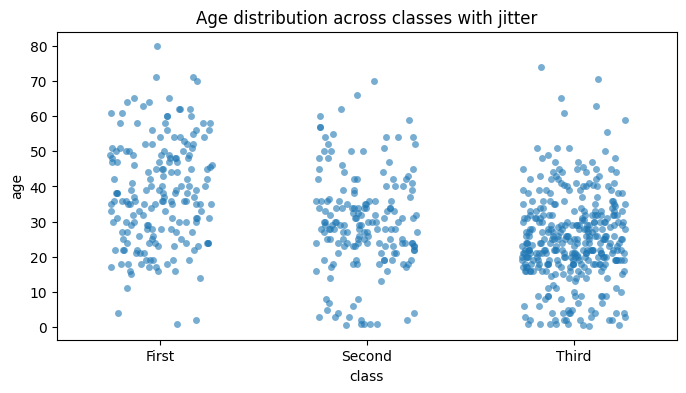

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from wordcloud import WordCloud

titanic = sns.load_dataset("titanic")

plt.figure(figsize=(8, 4))
sns.stripplot(x='class', y='age', data=titanic, jitter=0.25, alpha=0.6)
plt.title("Age distribution across classes with jitter")
plt.show()


### **Too less jitering**

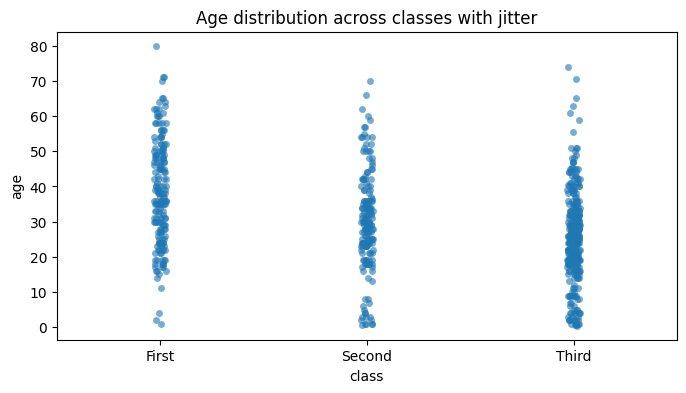

In [41]:
titanic = sns.load_dataset("titanic")

plt.figure(figsize=(8, 4))
sns.stripplot(x='class', y='age', data=titanic, jitter=0.03, alpha=0.6)
plt.title("Age distribution across classes with jitter")
plt.show()

### **Too much jittering**

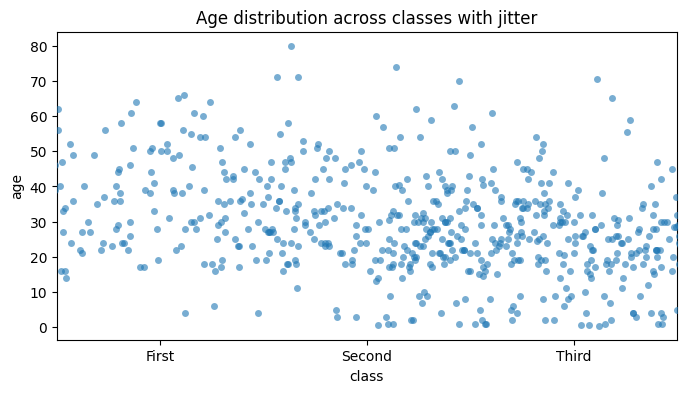

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

plt.figure(figsize=(8, 4))
sns.stripplot(x='class', y='age', data=titanic, jitter=0.90, alpha=0.6)
plt.title("Age distribution across classes with jitter")
plt.show()

## **Let's see with the famous Iris dataset again**

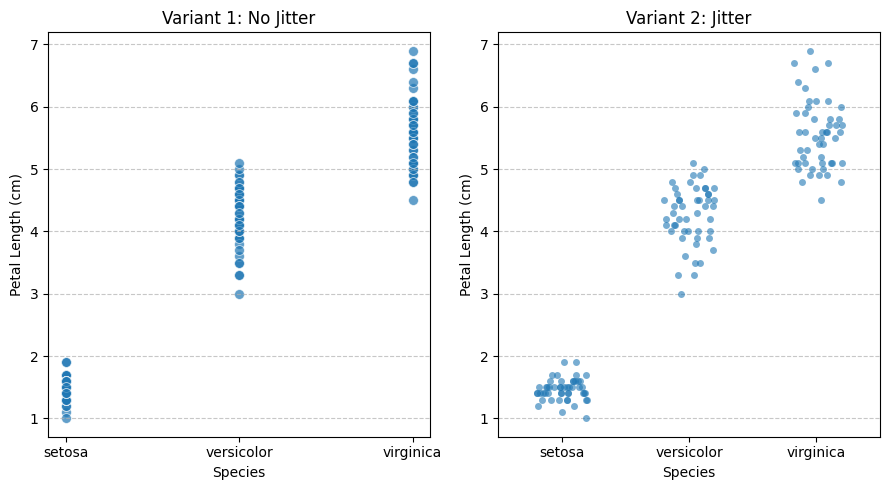

In [43]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

plt.figure(figsize=(9, 5))

# --- Variant 1: No Jitter (Overplotting visible) ---
plt.subplot(1, 2, 1)
sns.scatterplot(x="species", y="petal_length", data=iris, s=50, alpha=0.7)
plt.title("Variant 1: No Jitter")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)


# --- Variant 2: Jitter ---
plt.subplot(1, 2, 2)
sns.stripplot(x="species", y="petal_length", data=iris, jitter=0.2, alpha=0.6, size=5)
plt.title("Variant 2: Jitter")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# **2. Contour Plots**
What are they?

* Plots showing curves of equal values of a 3D surface on a 2D plane.

* Helpful for visualizing the density or function shape.

Where useful:

* Probability density plots.

* Terrain elevation maps.

* Heatmaps of bivariate distributions.

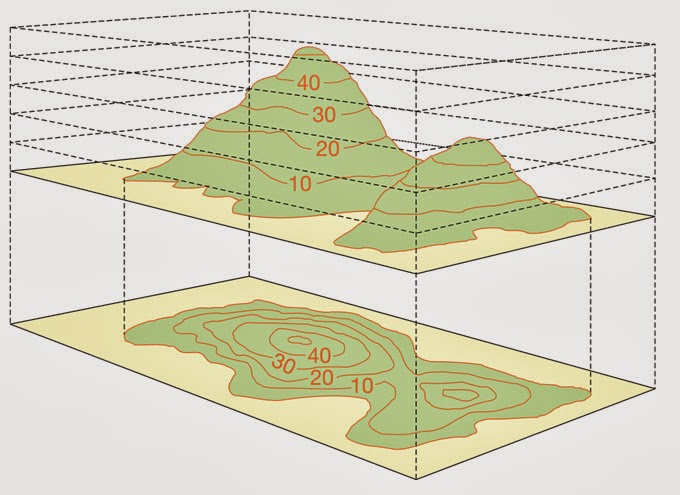

### **Basic Density Contour Plot for All Penguins**

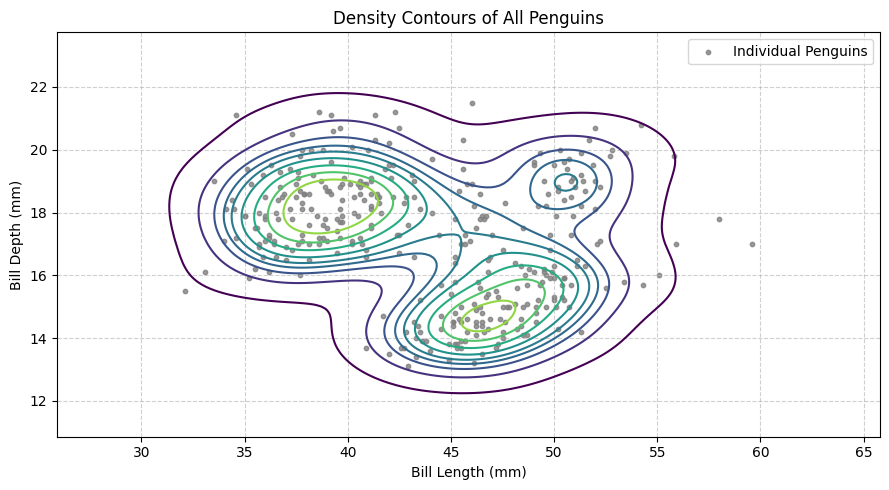

In [44]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with NaN values for simplicity, as kdeplot can handle it but it's cleaner
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

plt.figure(figsize=(9, 5)) # Set figure size for a single plot

# --- Basic Density Contour Plot for all penguins ---
# Use sns.kdeplot to draw a 2D kernel density estimate.
# The contours show regions of higher concentration of data points.
sns.kdeplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            cmap="viridis", # Colormap for the contours
            fill=False,     # Do not fill the contours, show only lines
            levels=10,      # Number of contour levels
            linewidths=1.5) # Thickness of contour lines

# Add individual data points as a scatter plot for context
plt.scatter(penguins['bill_length_mm'], penguins['bill_depth_mm'],
            s=10, alpha=0.8, color='gray', label='Individual Penguins')

plt.title("Density Contours of All Penguins")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability

plt.tight_layout()
plt.show()


### **Filled Density Contour Plot by Penguin Species**

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


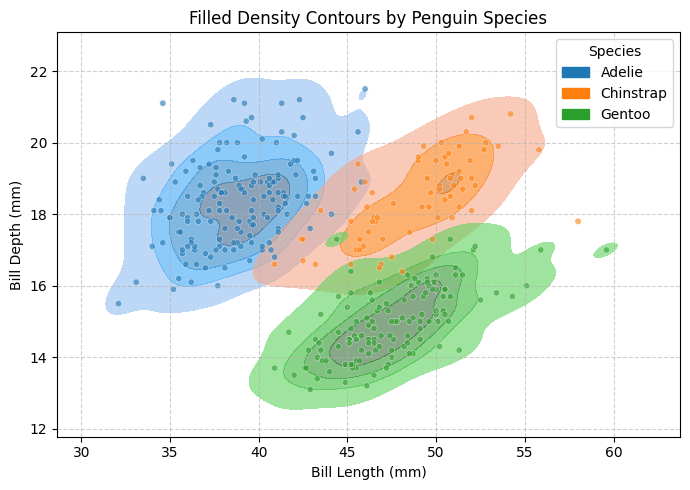

In [45]:
plt.figure(figsize=(7, 5)) # Set figure size for a single plot

# --- Filled Density Contour Plot by Species ---
# Use 'hue' to generate separate sets of contours for each species

sns.kdeplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species",      # Separate contours by species
            fill=True,          # Fill the areas between contours
            cmap="crest",       # Colormap (e.g., 'crest' for sequential, 'viridis' for distinct)
            alpha=0.6,          # Transparency for overlapping areas
            levels=5)           # Fewer levels for a cleaner filled look

# Optionally, add scatter points for clarity. Uncomment if desired:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, hue="species", s=20, alpha=0.6, legend=False)

plt.title("Filled Density Contours by Penguin Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid

# Get the current axes to access the legend
ax = plt.gca()
if ax.legend_ is not None:
    ax.legend_.set_title("Species")
else:
    print("Warning: Legend was not automatically generated by kdeplot.")

plt.tight_layout()
plt.show()

### **Explanation of Contour Plots:**
These contour plots visualize the estimated **density of data points** from the 'penguins' dataset.

Z-axis shows the estimated probability density of finding a penguin at a given (bill length, bill depth) combination.

**Variant 1** shows the overall density distribution for all penguins, highlighting areas where most penguins fall.

**Variant 2** separates the density distributions by 'species'. This clearly shows the distinct clusters of species based on their bill measurements, which is a common and insightful use of contour plots for real-world data exploration.

# **Time for some BONUS PLOTS**🎉

# **3. Bar plot with symbols**

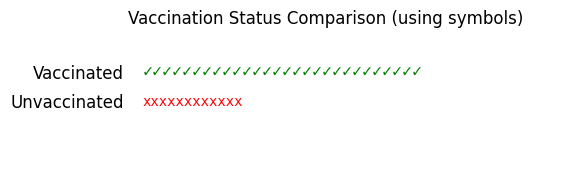

In [46]:
# Example data
total = 40
vaccinated = 28
unvaccinated = 12

# Symbols
symbol_vaccinated = '✓'
symbol_unvaccinated = 'x'

# Build bars
bar_vaccinated = symbol_vaccinated * vaccinated
bar_unvaccinated = symbol_unvaccinated * unvaccinated

# Plot
plt.figure(figsize=(6, 2))

# Vaccinated bar
plt.text(3, 0.7, bar_vaccinated, fontsize=12, fontfamily='monospace', color='green')

# Unvaccinated bar
plt.text(3, 0.5, bar_unvaccinated, fontsize=10, fontfamily='monospace', color='red')

# Add labels on the left
plt.text(1, 0.72, 'Vaccinated', ha='right', va='center', fontsize=12)
plt.text(1, 0.52, 'Unvaccinated', ha='right', va='center', fontsize=12)

# Configure plot
plt.axis('off')
plt.title('Vaccination Status Comparison (using symbols)', fontsize=12)
plt.xlim(-4, total + 8)
plt.tight_layout()
plt.show()

# **4. Pyramid Chart**
A pyramid chart is used to visualize population distribution by age and gender, showing how demographic groups compare.

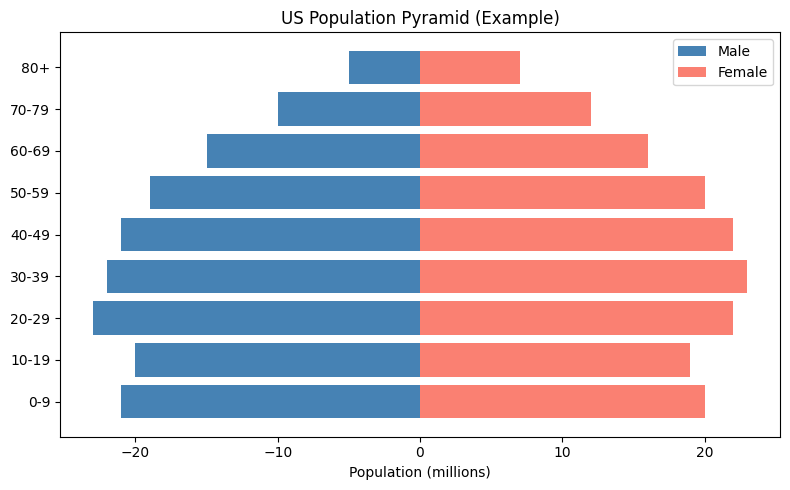

In [47]:
# Load real data from Census (age, gender, population)
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/USpop.csv"
# For demo, use fake structure - you can replace with real data
# Here we'll create a sample age pyramid
age_groups = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
male = [21, 20, 23, 22, 21, 19, 15, 10, 5]
female = [20, 19, 22, 23, 22, 20, 16, 12, 7]

df = pd.DataFrame({
    'Age': age_groups,
    'Male': [-v for v in male],  # Negative for left side
    'Female': female
})

# Plot
plt.figure(figsize=(8,5))
plt.barh(df['Age'], df['Male'], color='steelblue', label='Male')
plt.barh(df['Age'], df['Female'], color='salmon', label='Female')
plt.xlabel('Population (millions)')
plt.title('US Population Pyramid (Example)')
plt.legend()
plt.tight_layout()
plt.show()


# **5. Word Clouds**
What are they?

* Visual representation of text data where word size reflects frequency.

Where useful:

* Social media text, speeches, news articles.

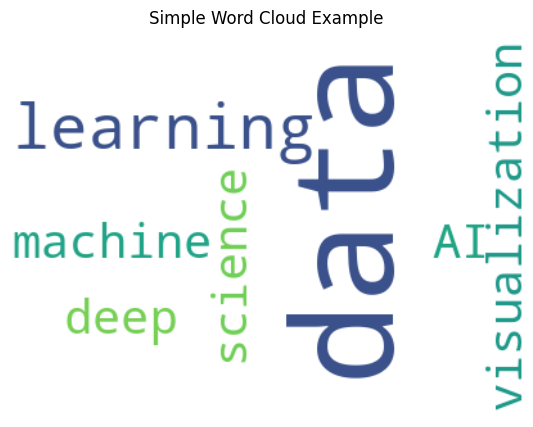

In [48]:
text = "data science machine learning AI deep learning data data data visualization"
wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Simple Word Cloud Example")
plt.show()

## **With real world data?**

In [49]:
text = """
Assam is a state in northeastern India, south of the eastern Himalayas along the Brahmaputra and Barak River valleys. Assam covers an area of 78,438 km2 (30,285 sq mi). The state is bordered by Bhutan and Arunachal Pradesh to the north; Nagaland and Manipur to the east; Meghalaya, Tripura, Mizoram and Bangladesh to the south; and West Bengal to the west via the Siliguri Corridor, a 22 kilometres (14 mi) wide strip of land that connects the state to the rest of India. Assamese and Boro are the official languages of Assam, while Bengali is an additional official language in the Barak Valley.
Assam is known for Assam tea and Assam silk. The state was the first site for oil drilling in Asia.[13] Assam is home to the one-horned Indian rhinoceros, along with the wild water buffalo, pygmy hog, tiger and various species of Asiatic birds, and provides one of the last wild habitats for the Asian elephant. The Assamese economy is aided by wildlife tourism to Kaziranga National Park and Manas National Park, which are World Heritage Sites. Dibru-Saikhowa National Park is famed for its feral horses. Sal tree forests are found in the state which, as a result of abundant rainfall, look green all year round. Assam receives more rainfall than most parts of India; this rain feeds the Brahmaputra River, whose tributaries and oxbow lakes provide the region with a distinctive hydro-geomorphic environment.
The first dated mention of the region comes from Periplus of the Erythraean Sea (1st century) and Ptolemy's Geographia (2nd century), which calls the region Kirrhadia, apparently after the Kirata population.[14][15] In the classical period and up to the 12th century, the region east of the Karatoya river, largely congruent to present-day Assam, was called Kamarupa, and alternatively, Pragjyotisha.[16] Though a western portion of Assam as a region continued to be called Kamrup, the Ahom kingdom that emerged in the east, and which came to dominate the entire Brahmaputra valley, was called Assam (e.g. Mughals used Asham); and the British province too was called Assam. Though the precise etymology of Assam is not clear, the name Assam is associated with the Ahom people, originally called Shyam (Shan).
Assam and adjoining regions have evidences of human settlement from the beginning of the Stone Age. The hills at the height of 1,500 to 2,000 feet (460–615 m) were popular habitats probably due to availability of exposed dolerite basalt, useful for tool-making.[18] Ambari site in Guwahati has revealed Shunga-Kushana era artefacts including flight of stairs and a water tank which may date from 1st century BCE and may be 2,000 years old. Experts speculate that another significant find at Ambari is Roman era Roman roulette pottery from the 2nd century BCE.
According to a late text, Kalika Purana (c. 9th–10th century CE), the earliest ruler of Assam was Mahiranga Danav of the Danava dynasty, which was removed by Naraka of Mithila and established the Bhauma dynasty. The last of these rulers, also Naraka, was slain by Krishna. Naraka's son Bhagadatta became the king, who (it is mentioned in the Mahabharata) fought for the Kauravas in the battle of Kurukshetra with an army of kiratas, chinas and dwellers of the eastern coast. At the same time towards the east in central Assam, Asura Kingdom was ruled by another line of kings.
Evidence indicates presence of civilization in Assam around 2nd century BCE, a rock cut stupa at Sri Surya Pahar has been dated to 200 BCE contemporary with rock cut Karle and Bhaja caves of Maharashtra.[22] Samudragupta's 4th-century-CE Allahabad pillar inscription mentions Kamarupa[23] and Davaka (Central Assam)[24] as frontier kingdoms of the Gupta Empire. Davaka was later absorbed by Kamarupa, which grew into a large kingdom that spanned from Karatoya river to near present Sadiya and covered the entire Brahmaputra valley, North Bengal, parts of Bangladesh and, at times Purnea and parts of West Bengal.[25] The kingdom was ruled by three dynasties who traced their lineage from a mleccha or Kirata Naraka; the Varmanas (c. 350–650 CE), the Mlechchha dynasty (c.655–900 CE) and the Kamarupa-Palas (c. 900–1100 CE), from their capitals in present-day Guwahati (Pragjyotishpura), Tezpur (Haruppeswara) and North Gauhati (Durjaya) respectively. All three dynasties claimed descent from Narakasura. In the reign of the Varman king, Bhaskaravarman (c. 600–650 CE), the Chinese traveller Xuanzang visited the region and recorded his travels. Later, after weakening and disintegration (after the Kamarupa-Palas), the Kamarupa tradition was extended to c. 1255 CE by the Lunar I (c. 1120–1185 CE) and Lunar II (c. 1155–1255 CE) dynasties.
The Medieval Assam history may have started with the advent of Ahoms in the early part of the 13th century and covers their entire rule of 600 years till 1826. The medieval history of Assam is especially known for it's conflict with Muslim powers under Turko-Afghan and Mughals, finally resulting in Assamese victory, however, this military glory was shattered in the early 19th century when it failed to resist the Burmese invasions , which led to its annexation. [26]
Chutia, a Bodo-Kachari group by origin, held the regions on both the banks of Brahmaputra with its domain in the area eastwards from Vishwanath (north bank) and Buridihing (south bank), in Upper Assam and in the state of Arunachal Pradesh. It was annexed by the Ahoms in the year 1524. The rivalry between the Chutias and Ahoms for the supremacy of eastern Assam led to a series of conflicts between them from the early 16th century.
The Dimasa, another Bodo-Kachari dynasty, (13th century–1854) ruled from Dikhow River to central and southern Assam and had their capital at Dimapur. With the expansion of Ahom kingdom, by the early 17th century, the Chutia areas were annexed and since c. 1536 the Kacharis remained only in Cachar and North Cachar, and more as an Ahom ally than a competing force.
The Ahoms, a Tai group, ruled Upper Assam.[27] The Ahom built their kingdom and consolidated their power in Eastern Assam with the modern town of Sibsagar as their capital. Until the early 16th century, the Ahoms ruled a small kingdom in Sibsagar district and suddenly expanded during King Suhungmung's rule taking advantage of weakening rule of Chutia and Dimasa kingdoms. By 1681, the whole track down to the border of the modern district of Goalpara came permanently under their sway. Ahoms ruled for nearly 600 years (1228–1826) with major expansions in the early 16th century at the cost of Chutia and Dimasa Kachari kingdoms. Since the 13th century, the centre of the Ahom polity was upper Assam; the kingdom was gradually extended to the Karatoya River in the 17th or 18th century. It was at its zenith during the reign of Sukhrungphaa or Rudra Singha (c. 1696–1714).
The Koch, another Bodo-Kachari dynasty, established sovereignty around 1510. The Koch kingdom in Western Assam and present-day North Bengal was at its zenith in the early reign of Nara Narayan (c. 1540–1587). It split into two in c. 1581, the western part as a Mughal vassal and the eastern as an Ahom satellite state. Later, in 1682, Koch Hajo was entirely annexed by the Ahoms.
Despite numerous invasions, mostly by the Muslim rulers, no western power ruled Assam until the arrival of the British. Though the Mughals made seventeen attempts to invade, they were never successful. The most successful invader Mir Jumla, a governor of Aurangzeb, briefly occupied Garhgaon (c. 1662–1663), the then capital, but found it difficult to prevent guerrilla attacks on his forces, forcing them to leave. The decisive victory of the Assamese led by general Lachit Borphukan on the Mughals, then under command of Raja Ram Singha, in the Battle of Saraighat in 1671 almost ended Mughal ambitions in this region. The Mughals were comprehensively defeated in the Battle of Itakhuli and expelled from Lower Assam during the reign of Gadadhar Singha in 1682.
The discovery of Camellia sinensis in 1834 in Assam was followed by testing in 1836–37 in London. The British allowed companies to rent land from 1839 onwards. Thereafter tea plantations proliferated in Eastern Assam,[29] where the soil and the climate were most suitable. Problems with the imported Han Chinese labourers from China and hostility from native Assamese resulted in the migration of forced labourers from central and eastern parts of India. After initial trial and error with planting the Chinese and the Assamese-Chinese hybrid varieties, the planters later accepted the local Camellia assamica as the most suitable variety for Assam. By the 1850s, the industry started seeing some profits. The industry saw initial growth, when in 1861, investors were allowed to own land in Assam and it saw substantial progress with the invention of new technologies and machinery for preparing processed tea during the 1870s.
Despite the commercial success, tea labourers continued to be exploited, working and living under poor conditions. Fearful of greater government interference, the tea growers formed the Indian Tea Association in 1888 to lobby to retain the status quo. The organisation was successful in this, but even after India's independence, conditions of the labourers have improved very little.[30]
In the later part of the 18th century, religious tensions and atrocities by the nobles led to the Moamoria rebellion (1769–1805), resulting in tremendous casualties of lives and property. The rebellion was suppressed but the kingdom was severely weakened by the civil war. Political rivalry between Prime Minister Purnananda Burhagohain and Badan Chandra Borphukan, the Ahom Viceroy of Western Assam, led to an invitation to the Burmese by the latter,[31][32][33][34] in turn leading to three successive Burmese invasions of Assam. The reigning monarch Chandrakanta Singha tried to check the Burmese invaders but he was defeated after fierce resistance. And Ahom occupied Assam was captured by the Burmese.[35][36][37]
A reign of terror was unleashed by the Burmese on the Assamese people,[38][39][40][41] who fled to neighbouring kingdoms and British-ruled Bengal.[42][43] The Burmese reached the East India Company's borders, and the First Anglo-Burmese War ensued in 1824. The war ended under the Treaty of Yandabo[44] in 1826, with the Company taking control of Western Assam and installing Purandar Singha as king of Upper Assam in 1833. The arrangement lasted until 1838 and thereafter the British gradually annexed the entire region. Thereafter the court language and medium of instruction in educational institutions of Assam was made Bengali, instead of Assamese. Starting from 1836 until 1873, this imposition of a foreign tongue created greater unemployment among the People of Assam and Assamese literature naturally suffered in its growth.[45][46]
Showing a historical incident at Kanaklata Udyan, Tezpur
Initially, Assam was made a part of the Bengal Presidency, then in 1906 it was made a part of Eastern Bengal and Assam province, and in 1912 it was reconstituted into a chief commissioners' province. In 1913, a legislative council and, in 1937, the Assam Legislative Assembly, were formed in Shillong, the erstwhile capital of the region. The British tea planters imported labour from central India adding to the demographic canvas.
The Assam territory was first separated from Bengal in 1874 as the 'North-East Frontier' non-regulation province, also known as the Assam Chief-Commissionership. It was incorporated into the new province of Eastern Bengal and Assam in 1905 after the partition of Bengal (1905–1911) and re-established in 1912 as Assam Province.[47]
After a few initially unsuccessful attempts to gain independence for Assam during the 1850s, anti-colonial Assamese joined and actively supported the Indian National Congress against the British from the early 20th century, with Gopinath Bordoloi emerging as the preeminent nationalist leader in the Assam Congress.[citation needed] Bordoloi's major political rival in this time was Sir Saidullah, who was representing the Muslim League, and had the backing of the influential Muslim cleric Maulana Bhasani.[48]
The Assam Postage Circle was established by 1873 under the headship of the Deputy Post Master General.[49]
At the turn of the 20th century, British India consisted of eight provinces that were administered either by a governor or a lieutenant-governor. Assam Province was one among the major eight provinces of British India. The table below shows the major original provinces during British India covering the Assam Province under the Administrative Office of the Chief Commissioner.
"""

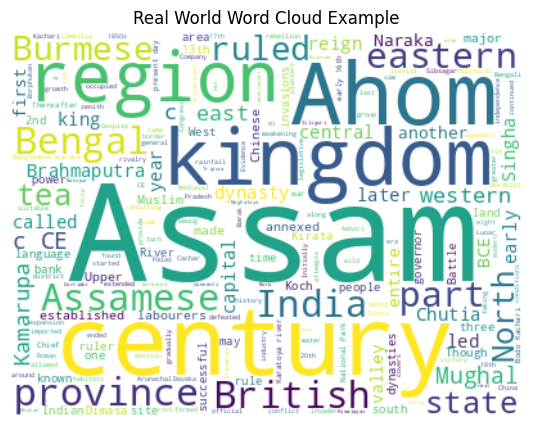

In [50]:
wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Real World Word Cloud Example")
plt.show()

## **Too many words?**

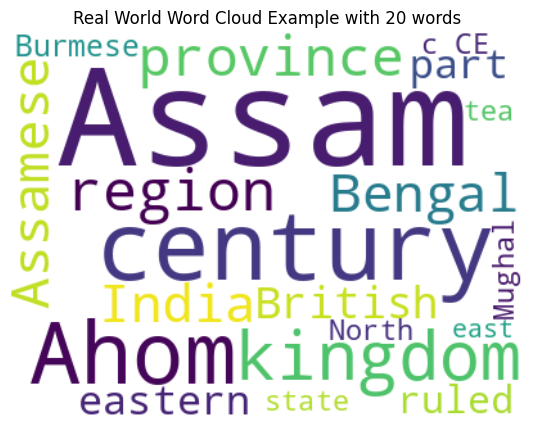

In [51]:
wordcloud = WordCloud(width=400, height=300, background_color='white',max_words=20).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Real World Word Cloud Example with 20 words")
plt.show()

*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*